##### What is this code?

This fault-finding exercise shows an unseen digital filter, specialised on noticing a change in a continuously streamed signal, called an online exponential filter, dating back to early radar applications.

Change detection means the comparison of each calculated value to the previous value.  If that numerical comparison of the current value with the previous value exceeds a fixed threshold value then an alarm is raised (or the location is stored as in this exercise). This process can be implemented on a computer as a simple digital filter.

The filter takes one data item, $x_{i}$, after the other (online). 

The exponential filter function is: $y_{i}=\alpha\,y_{i-1}+(1-\alpha)\,x_{i}$. Note that there is no exponential function since this is implemented as an iterative filter.

The factor $\alpha$ is a gain factor or 'forgetfulness' factor, quantifying how much influence on the filter previous data values should have with values in the interval $0<=\alpha<=1$. Small $\alpha$ lead to hardly any smoothing and the filter will react on any change in the signal very sensitively while large $\alpha$ should show a clear change but react little on noisy input.


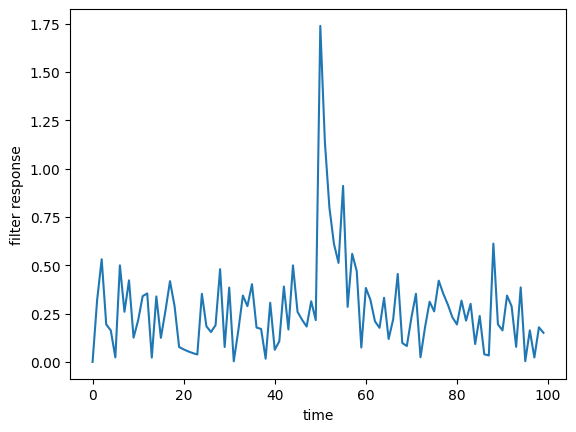

In [1]:
# YOUR CODE HERE
'''
Script: 
Demonstrate the exponential filter as a change detection method.
Note that one of the faults is at least one missing line of code in the 
changeDetect() loop.
'''
import numpy as np
import matplotlib.pyplot as plt

def expofilter(prval, data, alpha): 
    return alpha*prval + (1-alpha)*data

def changeDetect(data, alpha, threshold): 
    previousvalue = 0 # YR: fixed starter value; do not change.
    change = []
    response = []
    counter = 0
    for dat in data:
        value = expofilter(previousvalue, dat, alpha)
        if abs(value-previousvalue)>threshold:
            change.append(counter)
        response.append(abs(value-previousvalue))
        previousvalue = value
        counter+=1
    return np.array(response), np.array(change)

# Use case and testing; 
# YR: No error below this line.
# Note that the alarm level has been chosen as given on purpose and should
# not be changed.
tseries = np.random.randint(-3,3,100)
tseries[50] = 11
tseries[51] = 9
tseries[52] = 8
alarmlevel = 0.76
gainfactor = 0.84
resp, alarms = changeDetect(tseries, gainfactor, alarmlevel)

# plotting
plt.plot(resp)
plt.xlabel('time')
plt.ylabel('filter response')
plt.show()